## **Coupon Recommendation System**

## **Data Dictionary**

1.	Gender: Female, Male
2.	Age: 21, 46, 26, 31, 41, 50plus, 36, below21
3.	Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
4.	has_Children: 1: has children, 0: No children
5.	Education: Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School
6.	Occupation: Traveller’s occupation
7.	Income: income of the traveller
8.	Car: Description of vehicle driven by the traveller
9.	Bar: how many times does the traveller go to a bar every month?
10.	Coffee House: how many times does the user go to a coffeehouse every month?
11.	Carry Away: how many times does the user get takeaway food every month?
12.	RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than 20everymonth?
13.	Restaurant20To50: how many times does the user go to a restaurant with an average expense per person of $ 20 - $50 every month.
14.	Destination: destination of traveller
15.	Passenger: who are the passengers in the car
16.	Weather: weather when the user is driving (Sunny, Rainy, Snowy)
17.	Temperature: temperature in Fahrenheit when the user is driving
18.	Coupon: Type of Coupon
19.	Expiration: Validity of Coupon
20.	toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
21.	toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1) 22
22.	toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
23.	direction_same: whether the restaurant/cafe/bar is in the same direction as the traveler’s current destination (0,1)
24.	direction_opp: whether the restaurant/cafe/bar is in the opposite direction as the user’s current destination (0,1)
25.	Accept(Y/N?)- Target column( whether user will accept the coupon or not?) 1:accepted, 0:rejected




In [410]:
# importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,roc_auc_score, roc_curve,confusion_matrix, RocCurveDisplay
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [269]:
pip install catboost

In [411]:
# data import
data = pd.read_csv("/content/drive/MyDrive/Data_Set_Practice/Placement_Data /DS_DATA_coupon_recommendation.csv")
data

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [412]:
#Understanding the columns ,datatypes and missing values
print("\nColumn names:\n", data.columns)
print("\nData types:\n", data.dtypes)
print("\nMissing values before cleaning:\n", data.isnull().sum().sort_values(ascending=False))


Column names:
 Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

Data types:
 destination             object
passanger               object
weather                 object
temperature              int64
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLess

In [413]:
# Data Dimension
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 12684 rows and 25 columns.


In [414]:
#load the data to understand the attributes and data types
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [415]:
data.info() #get a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [416]:
print("\nMissing values (sorted in descending order) Before cleaning:")
print(data.isnull().sum().sort_values(ascending=False))


Missing values (sorted in descending order) Before cleaning:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
weather                     0
passanger                   0
destination                 0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
temperature                 0
income                      0
occupation                  0
has_children                0
education                   0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64


In [417]:
# Checking the data type and missing values with sample

# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),
                            columns = ['Missing_percent'])

# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)

# Renaming the dataframe columns
sample_data.rename(columns = {0: 'Sample1',
                              1: 'Sample2'}, inplace = True)

# Concatinating the above dataframe
data_concat = pd.concat([data_missing, data_type, sample_data], axis=1)

data_concat

,Missing_percent,Data_type,Sample1,Sample2
destination,0.00,object,No Urgent Place,No Urgent Place
passanger,0.00,object,Alone,Friend(s)
weather,0.00,object,Sunny,Sunny
temperature,0.00,int64,55,80
coupon,0.00,object,Restaurant(<20),Coffee House
expiration,0.00,object,1d,2h
gender,0.00,object,Female,Female
age,0.00,object,21,21
maritalStatus,0.00,object,Unmarried partner,Unmarried partner
has_children,0.00,int64,1,1


In [418]:
# Number of categorical and numerical cols
num, obj = 0, 0
for feature in data.columns:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print(f'The data has {num} numerical and {obj} categorical features.')

The data has 8 numerical and 17 categorical features.


In [419]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [420]:
# data duplicates
print(f'The data has {data[data.duplicated()].shape[0]} duplicate rows.')

The data has 291 duplicate rows.


In [421]:
data[data.duplicated()]

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
30,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,0
96,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,less1,1~3,less1,1~3,1,0,0,0,1,1
162,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,26,Single,0,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
184,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,26,Single,1,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
201,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,never,gt8,1~3,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,36,Divorced,1,...,gt8,4~8,4~8,less1,1,0,0,0,1,1
10515,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,50plus,Married partner,1,...,4~8,1~3,4~8,1~3,1,0,0,0,1,1
10592,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,...,never,less1,less1,less1,1,0,0,0,1,0
10670,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,...,never,1~3,less1,never,1,0,0,0,1,0


In [422]:
data.shape

(12684, 25)

In [423]:
data.duplicated().sum()

np.int64(291)

In [424]:
# Remove duplicate rows
data = data.drop_duplicates()

In [425]:
print("Remaining duplicates:", data.duplicated().sum())

Remaining duplicates: 0


In [426]:
data.shape

(12393, 25)

In [427]:
# Understanding the categorical data
for attribute in data.columns:
    if data[attribute].dtype == 'O':
        if data[attribute].nunique() == 1:
            print(f'**{attribute} has 1 unique value.**')
        else:
            print(f'{attribute} has {data[attribute].nunique()} unique value.')

destination has 3 unique value.
passanger has 4 unique value.
weather has 3 unique value.
coupon has 5 unique value.
expiration has 2 unique value.
gender has 2 unique value.
age has 8 unique value.
maritalStatus has 5 unique value.
education has 6 unique value.
occupation has 25 unique value.
income has 9 unique value.
car has 5 unique value.
Bar has 5 unique value.
CoffeeHouse has 5 unique value.
CarryAway has 5 unique value.
RestaurantLessThan20 has 5 unique value.
Restaurant20To50 has 5 unique value.


In [428]:
# Understanding the numerical data
for attribute in data.columns:
    if data[attribute].dtype != 'O':
        if data[attribute].nunique() == 1:
            print(f'**{attribute} has 1 unique value.**')
        else:
            print(f'{attribute} has {data[attribute].nunique()} unique value.')

temperature has 3 unique value.
has_children has 2 unique value.
**toCoupon_GEQ5min has 1 unique value.**
toCoupon_GEQ15min has 2 unique value.
toCoupon_GEQ25min has 2 unique value.
direction_same has 2 unique value.
direction_opp has 2 unique value.
Accept(Y/N?) has 2 unique value.


In [429]:
data.drop('toCoupon_GEQ5min',axis=1, inplace=True)

We can tell that **'toCoupon_GEQ5min'** has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column.

In [430]:
data.nunique()

,0
destination,3
passanger,4
weather,3
temperature,3
coupon,5
expiration,2
gender,2
age,8
maritalStatus,5
has_children,2


In [431]:
print("\nMissing values (sorted in descending order):")
print(data.isnull().sum().sort_values(ascending=False))


Missing values (sorted in descending order):
car                     12287
CoffeeHouse               215
Restaurant20To50          188
CarryAway                 148
RestaurantLessThan20      128
Bar                       106
destination                 0
passanger                   0
age                         0
gender                      0
expiration                  0
coupon                      0
temperature                 0
weather                     0
occupation                  0
maritalStatus               0
income                      0
has_children                0
education                   0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64


In [432]:
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nColumns with missing values (sorted):")
print(missing)


Columns with missing values (sorted):
car                     12287
CoffeeHouse               215
Restaurant20To50          188
CarryAway                 148
RestaurantLessThan20      128
Bar                       106
dtype: int64


In [433]:
# Missing values check

mv_grt30_lst = []   # list to store feature with more than 30% missing values
mv_lsr30_lst = []   # list to store feature with less than 30% missing values

for feature in data.columns:
    if (data[feature].isnull().mean()*100) > 30:
        mv_grt30_lst.append(feature)
    elif 0.0000 < (data[feature].isnull().mean()*100) <= 30:
        mv_lsr30_lst.append(feature)

print(f'There are {len(mv_grt30_lst)} features that has more than 30% missing values.')
print(f'This  {mv_grt30_lst} features that has more than 30% missing values.')
print(f'There are {len(mv_lsr30_lst)} features that has less than 30% missing values.')
print(f'These  {mv_lsr30_lst} features that has less than 30% missing values.')

There are 1 features that has more than 30% missing values.
This  ['car'] features that has more than 30% missing values.
There are 5 features that has less than 30% missing values.
These  ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] features that has less than 30% missing values.


In [434]:
print("\nMissing values (sorted in descending order) Before cleaning:")
print(data.isnull().sum().sort_values(ascending=False))


Missing values (sorted in descending order) Before cleaning:
car                     12287
CoffeeHouse               215
Restaurant20To50          188
CarryAway                 148
RestaurantLessThan20      128
Bar                       106
destination                 0
passanger                   0
age                         0
gender                      0
expiration                  0
coupon                      0
temperature                 0
weather                     0
occupation                  0
maritalStatus               0
income                      0
has_children                0
education                   0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64


In [435]:
# Drop 'car' column due to high number of missing values
data.drop('car', axis=1, inplace=True)

There are some missing values in Car,CoffeeHouse ,Restaurant20To50,CarryAway ,RestaurantLessThan20  and Bar  columns and out of these the 'car' variable has  more 12287 null values, more than 99% of the values are NaN. We can just drop it off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

In [436]:
data.shape

(12393, 23)

In [437]:
#Handle Missing Values

for col in data.columns:
    if data[col].dtype == 'object':   # For categorical columns
        data[col] = data[col].fillna(data[col].mode()[0])
    else:                             # For numerical columns
        data[col] = data[col].fillna(data[col].median())


In [438]:
print("\nMissing values after cleaning:\n", data.isnull().sum().sort_values(ascending=False))


Missing values after cleaning:
 destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64


In [439]:
# Analysing the dependent / target attribute
round(data['Accept(Y/N?)'].value_counts(normalize=True)*100 , 2)

,proportion
Accept(Y/N?),
1,56.58
0,43.42


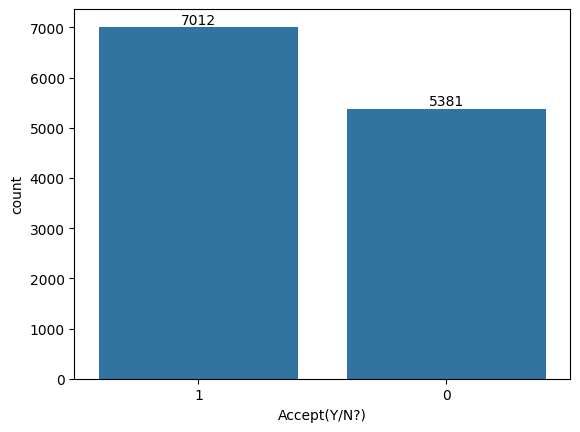

In [440]:
# Plotting the graph for the target data
ax = sns.countplot(x='Accept(Y/N?)', data=data,
              order=data['Accept(Y/N?)'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

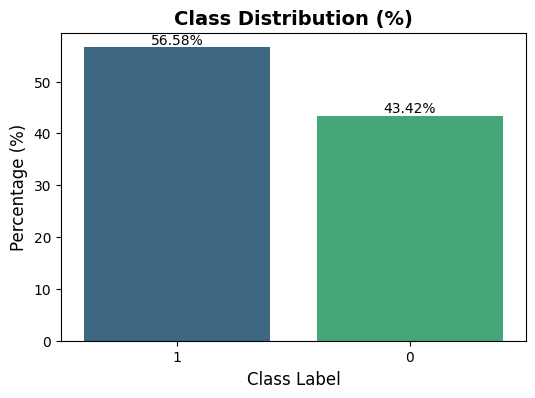

In [441]:

# Value counts (as percentages)
class_counts = data['Accept(Y/N?)'].value_counts(normalize=True) * 100

# Plot with a fixed order: 1 first, then 0
plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    order=[1, 0],   # Force order: 1 first, 0 second
    palette="viridis"
)

# Add labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")

plt.title("Class Distribution (%)", fontsize=14, fontweight="bold")
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.show()

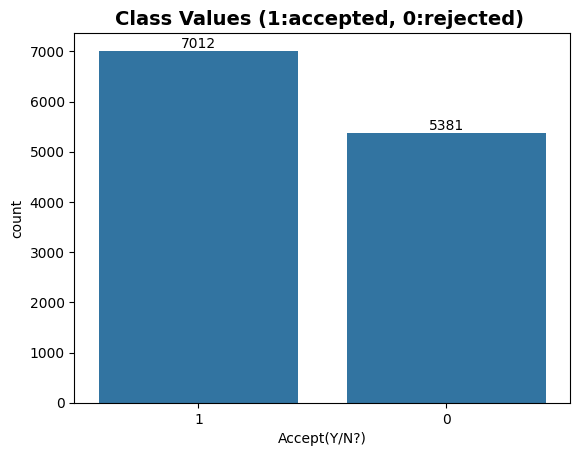

In [442]:
# understand the target variable
#Plotting the graph for Label
ax = sns.countplot(x=data['Accept(Y/N?)'],
                   order=data['Accept(Y/N?)'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Class Values (1:accepted, 0:rejected) ", fontsize=14, fontweight="bold")
plt.show()

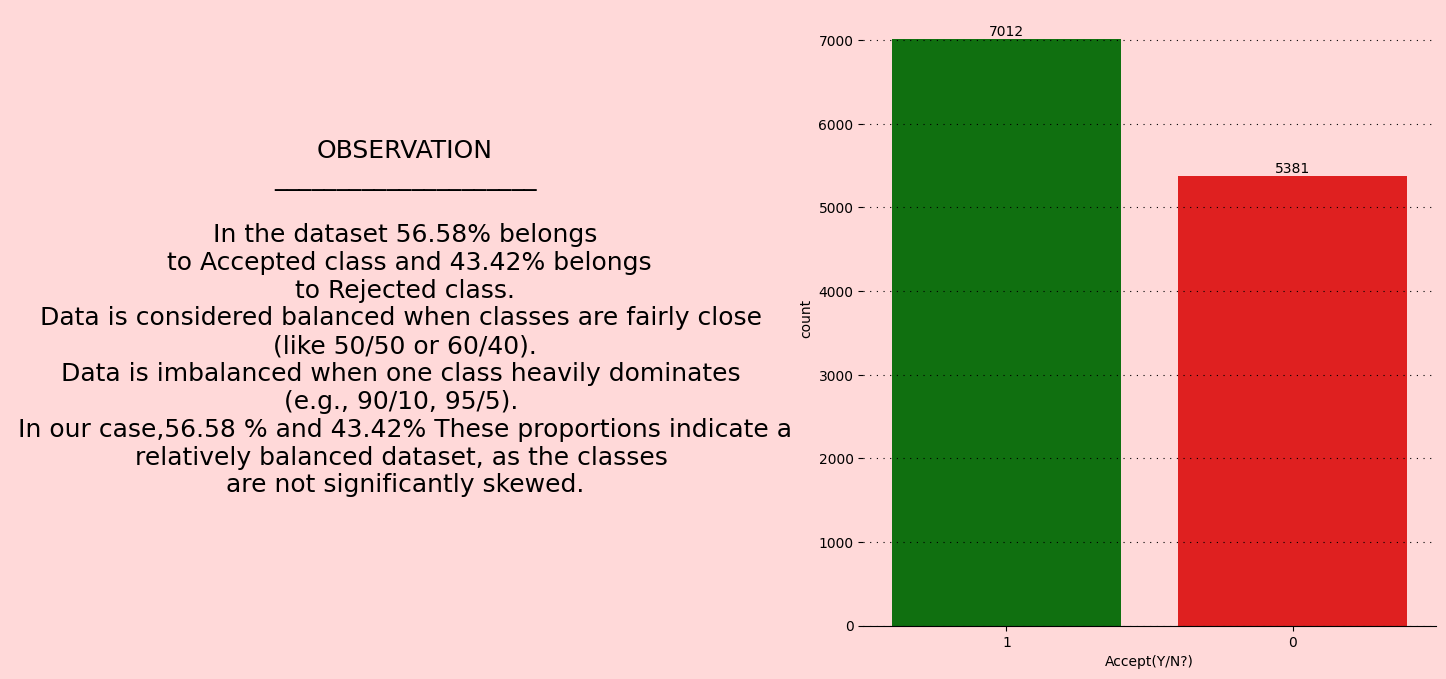

In [443]:
# Analysing the target column

# creating a plot structure
fig = plt.figure(figsize=(17, 8))    #sets the width to 17 inches and height to 8 inches
spec = fig.add_gridspec(1, 2)        # the figure is split into two side-by-side sections.
spec.update(wspace=0.3, hspace=0.15) #Adjusts spacing between subplots.wspace=0.3 → adds extra space between the left and right plots.
sec_1 = fig.add_subplot(spec[0,0])   #Adds the first subplot in grid position row 0, column 0 (top-left).
sec_2 = fig.add_subplot(spec[0,1])   #Adds the second subplot in grid position row 0, column 1 (top-right).

# adding color
bg_color = '#ffd9d9'

for selection in [ fig,sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph for label
ax = sns.countplot(x=data['Accept(Y/N?)'],
                   order=data['Accept(Y/N?)'].value_counts().index,
                   palette=['green','red'])

# Add value labels
for container in ax.containers:
    ax.bar_label(container)    #The count of each class is displayed on top of each bar.

sec_2.grid(color='black', axis='y', ls=':', dashes=(1,5))

# Narrating the observation
max, min = round(data['Accept(Y/N?)'].value_counts(normalize=True)*100, 2)
sec_1.text(0.5, 0.5, f'OBSERVATION\n_____________________\n\nIn the dataset {max}% belongs\n to Accepted class \
and {min}% belongs\n to Rejected class. \nData is considered balanced when classes are fairly close \n(like 50/50 or 60/40).\nData is imbalanced when one class heavily dominates \n(e.g., 90/10, 95/5). \n In our case,56.58 % and 43.42% These proportions indicate a \nrelatively balanced dataset, as the classes \nare not significantly skewed.', va='center', ha='center', size=18)

# Removing the spines and axis
sec_1.xaxis.set_visible(False) #Hide axes ticks and labels on sec_1:
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for section in [sec_1, sec_2]:
        if position == 'bottom' and section == sec_2:
            continue
        else:
            section.spines[position].set_visible(False)

In [444]:
def clean_income(val):
    # Remove unwanted characters
    val = str(val).replace('$', '').replace(' ', '').lower()

    if '-' in val:
        # Handle range like 37500-49999
        lo, hi = val.split('-')
        return (int(lo) + int(hi)) / 2

    elif 'lessthan' in val:
        # Handle 'Lessthan12500'
        num = ''.join([ch for ch in val if ch.isdigit()])
        return int(num) / 2  # average between 0 and that number

    elif 'or' in val and 'more' in val:
        # Handle '100000 or More'
        num = ''.join([ch for ch in val if ch.isdigit()])
        return int(num)

    else:
        # For any other numeric or unknown cases
        num = ''.join([ch for ch in val if ch.isdigit()])
        return int(num) if num else None

# Apply the cleaning function
data['income'] = data['income'].apply(clean_income)



In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12393 non-null  object 
 1   passanger             12393 non-null  object 
 2   weather               12393 non-null  object 
 3   temperature           12393 non-null  int64  
 4   coupon                12393 non-null  object 
 5   expiration            12393 non-null  object 
 6   gender                12393 non-null  object 
 7   age                   12393 non-null  object 
 8   maritalStatus         12393 non-null  object 
 9   has_children          12393 non-null  int64  
 10  education             12393 non-null  object 
 11  occupation            12393 non-null  object 
 12  income                12393 non-null  float64
 13  Bar                   12393 non-null  object 
 14  CoffeeHouse           12393 non-null  object 
 15  CarryAway             12

In [446]:
# Numerical and categorical variables
num_lst = list(data.select_dtypes(include=['number']).columns)
cat_lst = list(data.select_dtypes('object').columns)


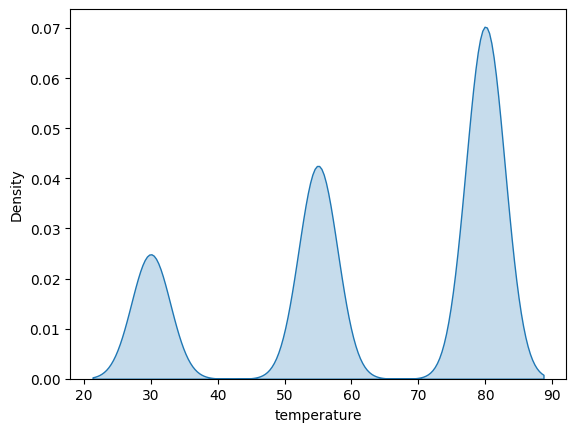

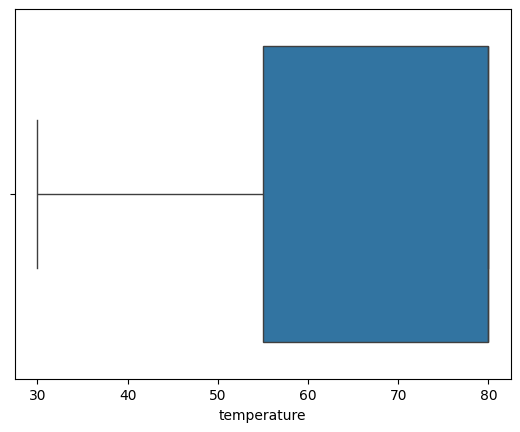

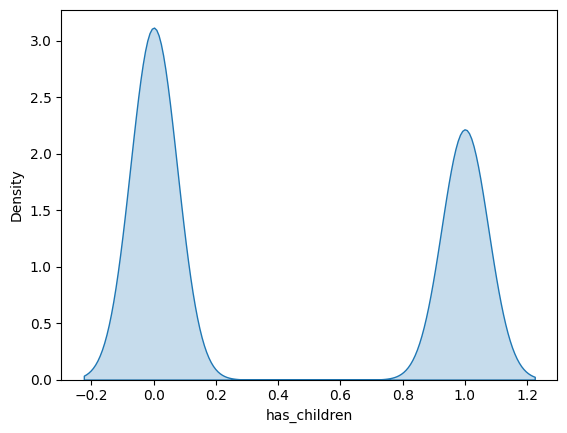

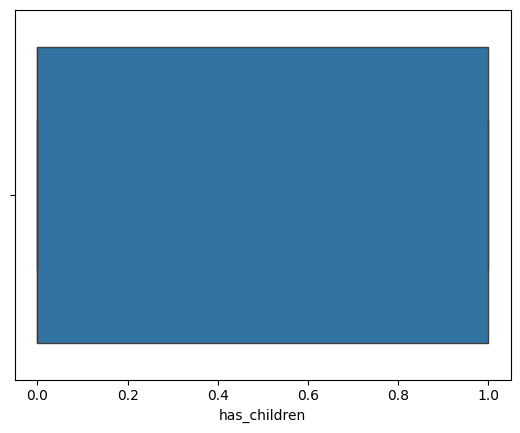

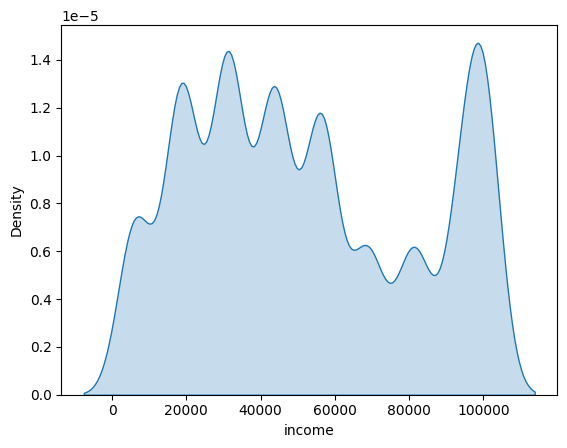

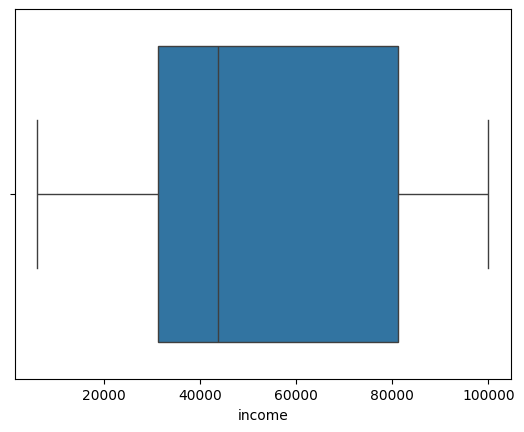

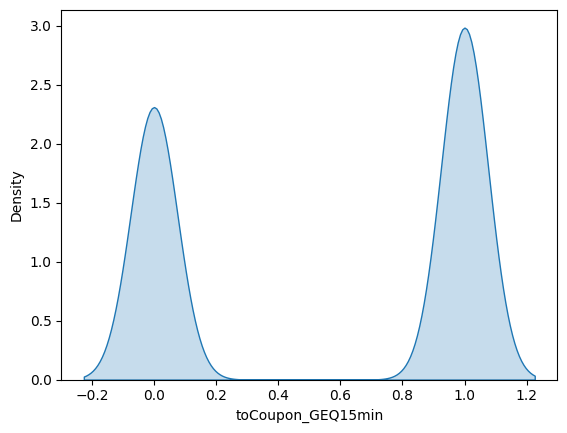

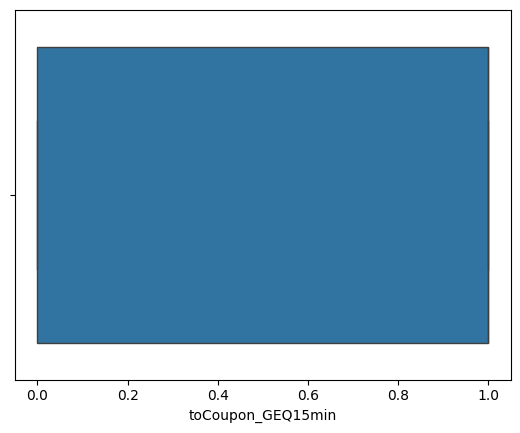

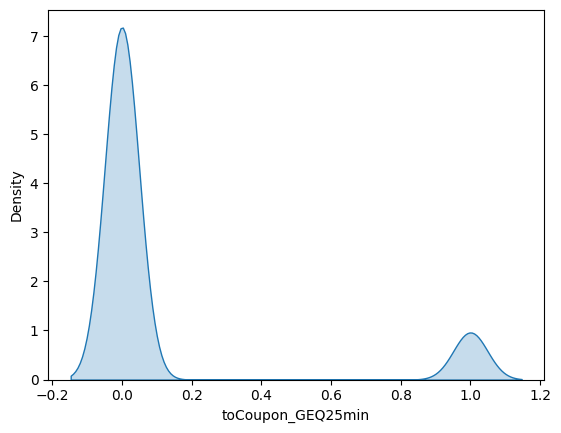

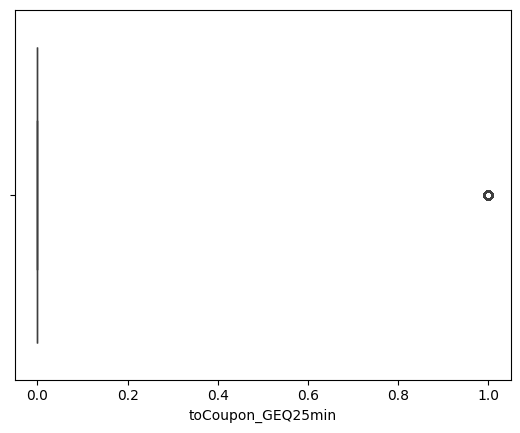

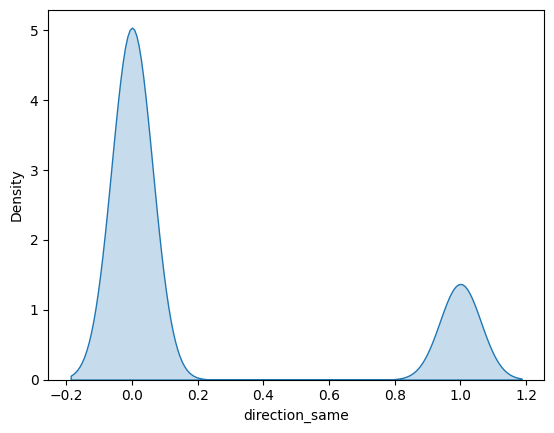

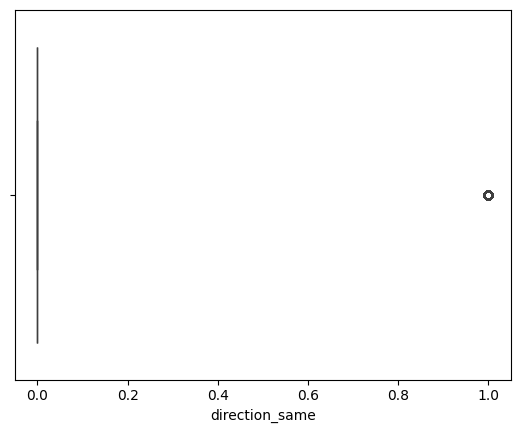

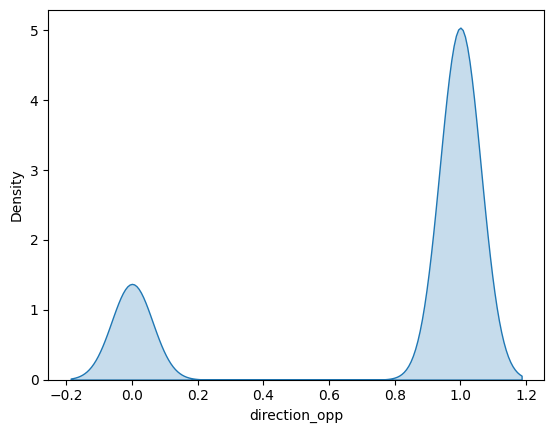

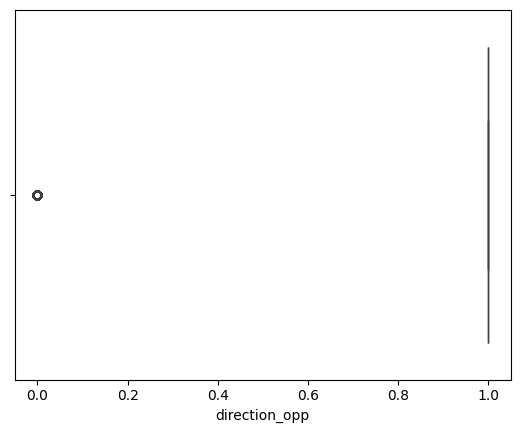

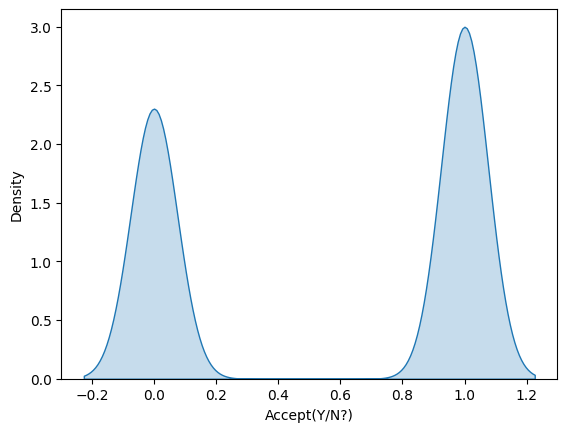

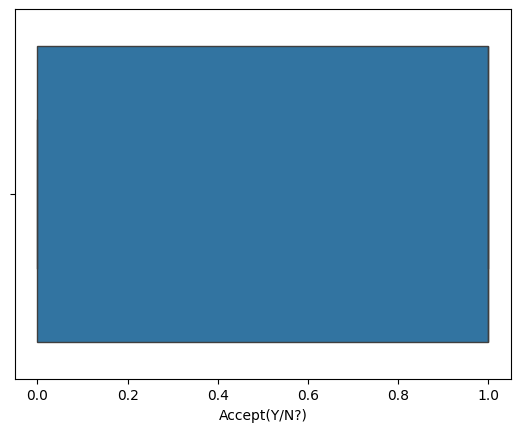

In [447]:
# distribution plot for numerical data
for cols in num_lst:
    if data[cols].nunique() > 1:
        sns.kdeplot(data[cols], fill=True)
        plt.show()
        sns.boxplot(data[cols], orient='h')
        plt.show()

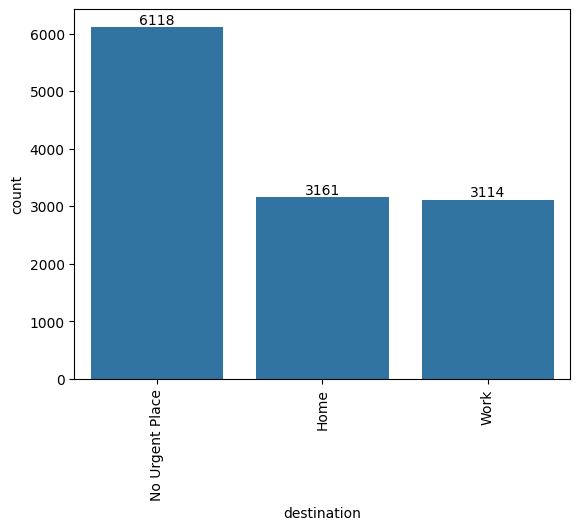

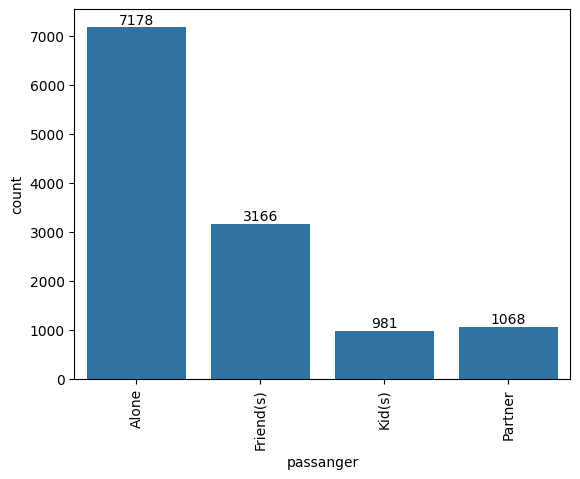

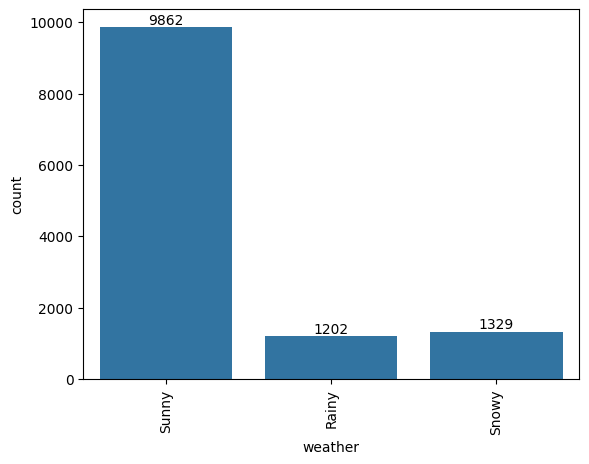

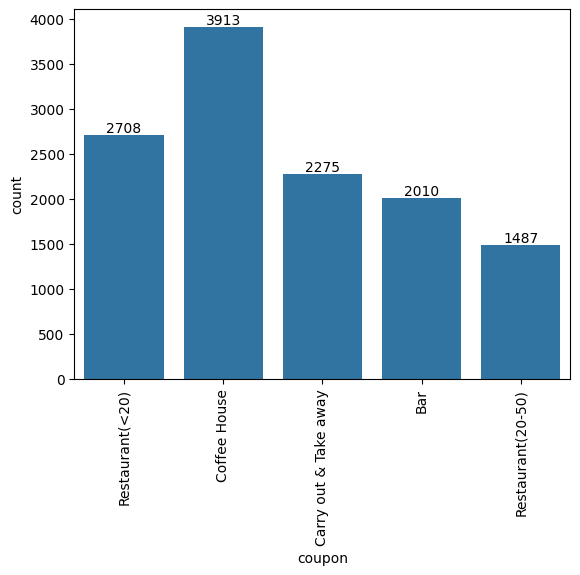

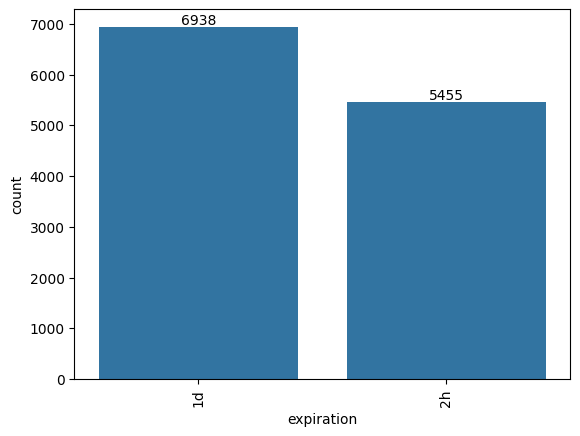

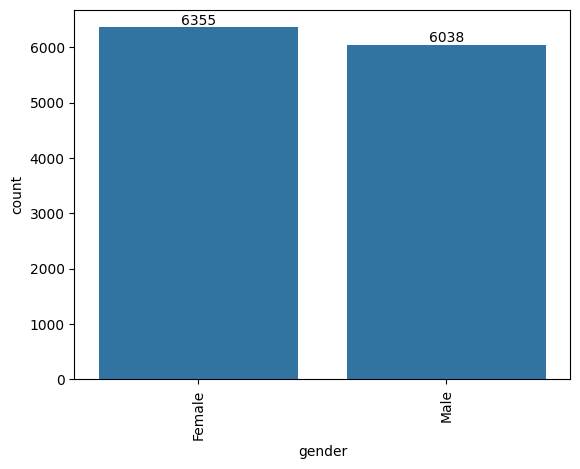

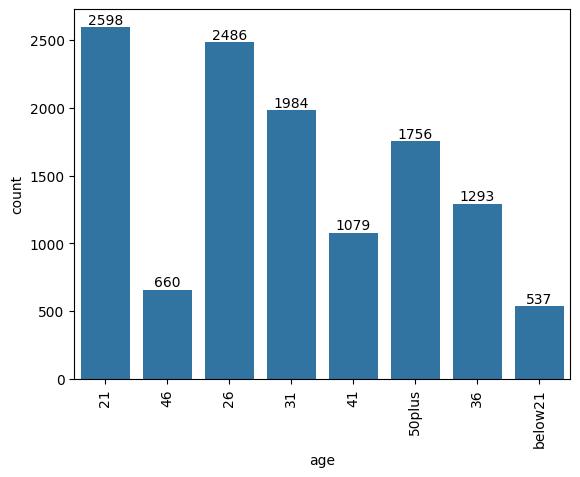

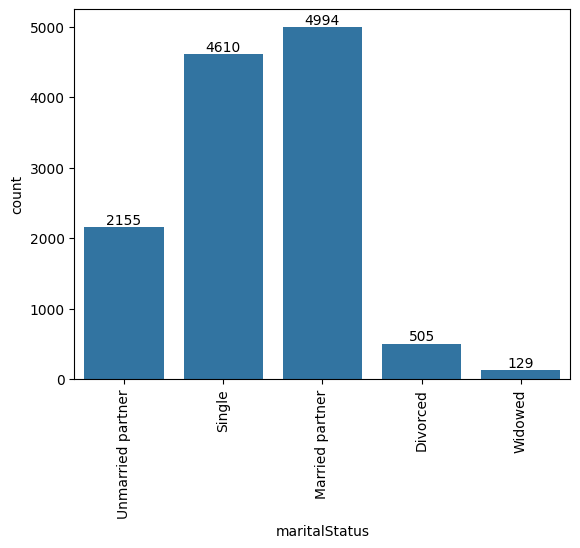

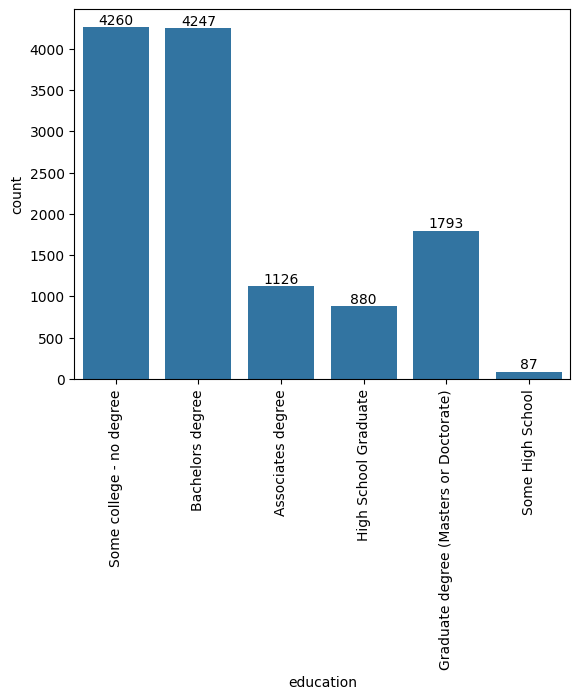

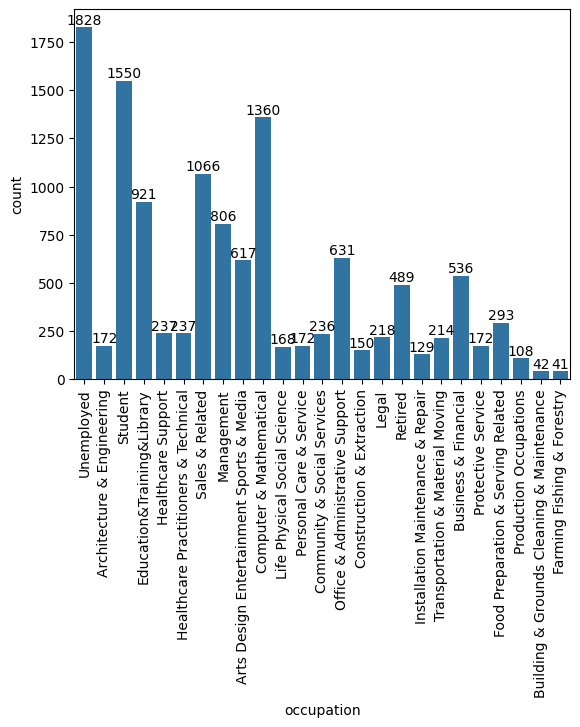

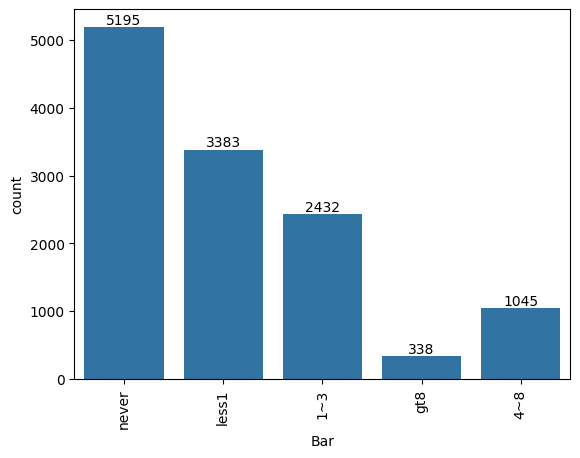

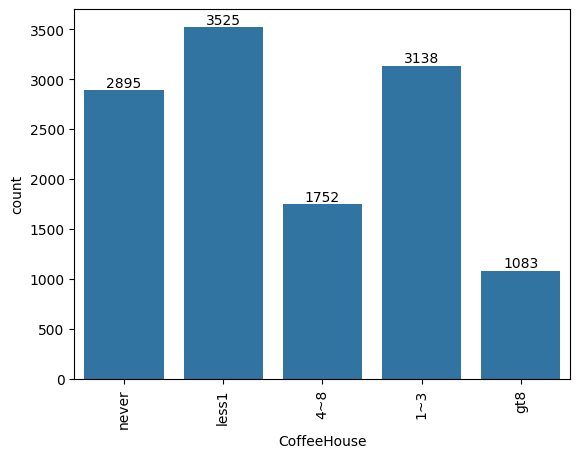

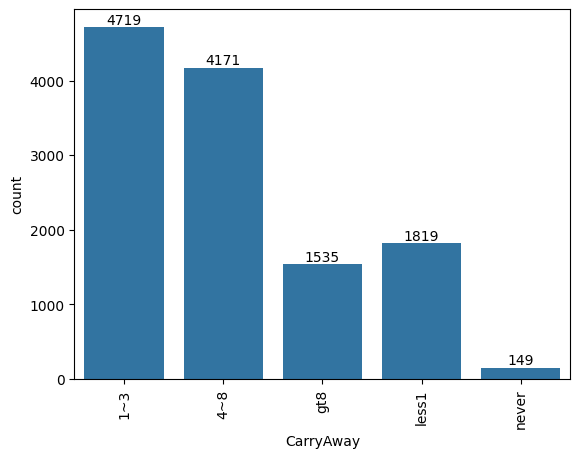

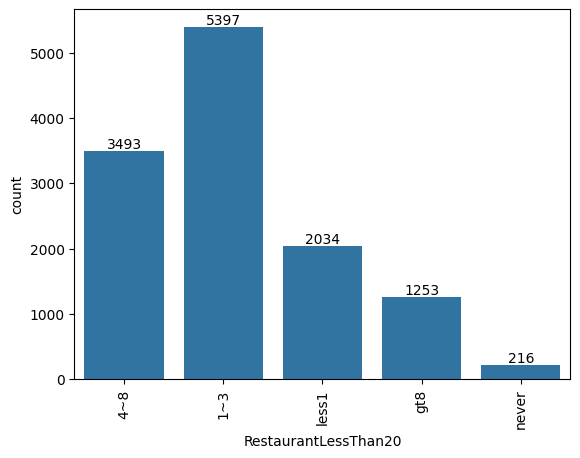

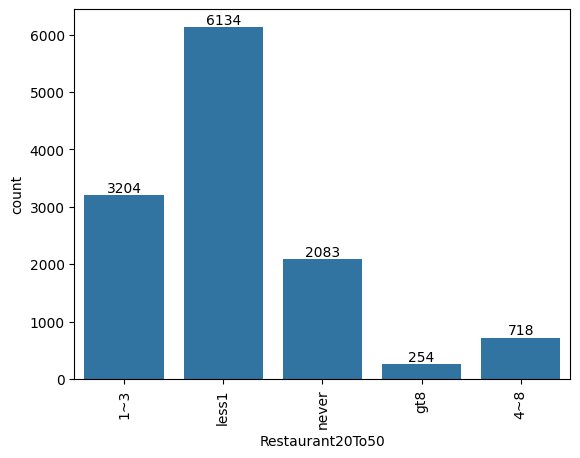

In [448]:
# count plot for categorical data
for cols in cat_lst:
    ax = sns.countplot(x=data[cols])
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    plt.show()

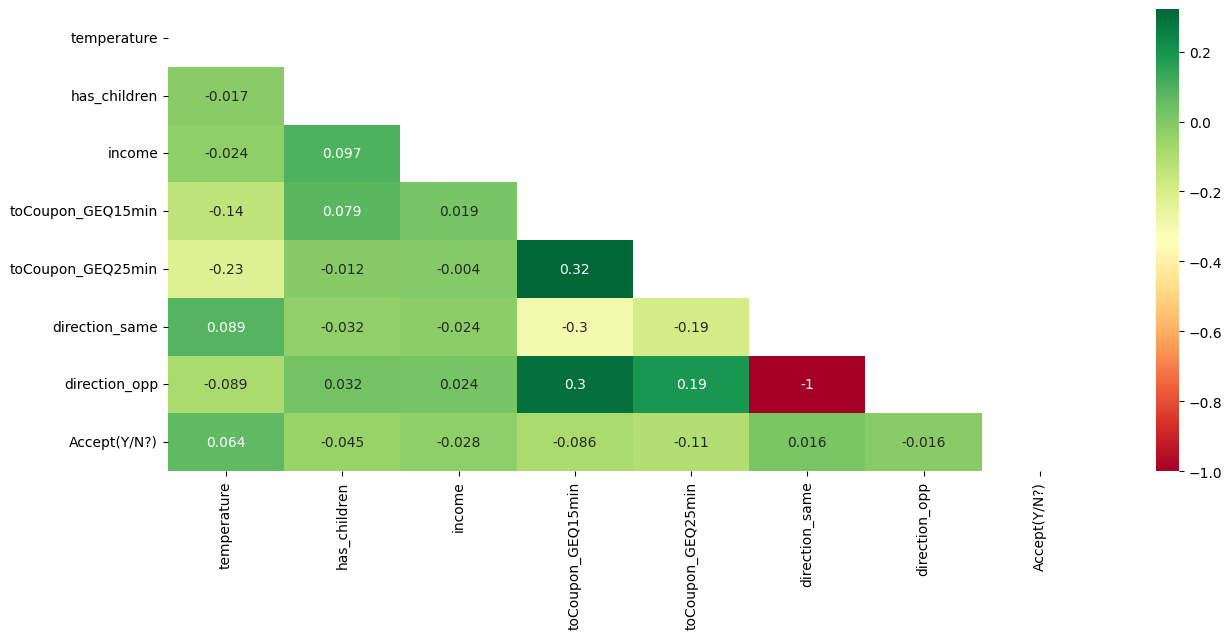

In [449]:
plt.figure(figsize = (15,6))
corr = data.corr(numeric_only=True)
upper = np.triu(corr) #np.triu() returns the upper triangular part of the correlation matrix.
sns.heatmap(corr, annot=True, cmap='RdYlGn',mask=upper)
plt.show()

In [450]:
#  list comprehension
cat_cols = [cols for cols in data.columns if data[cols].dtype == 'O']

# classes in each category
for cols in cat_cols:
    print(cols       ,':', data[cols].unique())

destination : ['No Urgent Place' 'Home' 'Work']
passanger : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather : ['Sunny' 'Rainy' 'Snowy']
coupon : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration : ['1d' '2h']
gender : ['Female' 'Male']
age : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation : ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction

In [451]:
#  list comprehension
num_cols = [cols for cols in data.columns if data[cols].dtype != 'O']

# unique values in each numeric column
for cols in num_cols:
    print(cols       ,':', data[cols].unique())

temperature : [55 80 30]
has_children : [1 0]
income : [ 43749.5  68749.5  18749.5  81249.5  56249.5  31249.5 100000.   93749.5
   6250. ]
toCoupon_GEQ15min : [0 1]
toCoupon_GEQ25min : [0 1]
direction_same : [0 1]
direction_opp : [1 0]
Accept(Y/N?) : [1 0]


In [452]:
# Select numeric columns

num_cols = [col for col in data.select_dtypes(include=['number']).columns
            if data[col].nunique() > 2]

# Loop through numeric columns and calculate outlier count
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

temperature: 0 outliers
income: 0 outliers


In [453]:
cat_features = [col for col in x.columns if x[col].dtype == 'object']

In [454]:
# dependency split
x = data.drop('Accept(Y/N?)', axis=1)
y = data[['Accept(Y/N?)']]

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

# dimension of the split
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8675, 22) (8675, 1)
(3718, 22) (3718, 1)


In [455]:
for col in cat_features:
    if x_train[col].dtype == 'float64':
        x_train[col] = x_train[col].astype(str)
        x_test[col] = x_test[col].astype(str)

In [456]:
train_pool = Pool(data=x_train, label=y_train, cat_features=cat_features)

In [457]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500],
    'l2_leaf_reg': [1, 3, 5]
}


In [258]:
model = CatBoostClassifier(
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0
)

grid_result = model.grid_search(param_grid, train_pool, cv=3, partition_random_seed=42, verbose=1)


bestTest = 0.7187319885
bestIteration = 196

0:	loss: 0.7187320	best: 0.7187320 (0)	total: 15.4s	remaining: 13m 37s

bestTest = 0.7331412104
bestIteration = 298

1:	loss: 0.7331412	best: 0.7331412 (1)	total: 21.6s	remaining: 9m 21s

bestTest = 0.7452449568
bestIteration = 291

2:	loss: 0.7452450	best: 0.7452450 (2)	total: 30.3s	remaining: 8m 34s

bestTest = 0.721037464
bestIteration = 255

3:	loss: 0.7210375	best: 0.7452450 (2)	total: 36.4s	remaining: 7m 34s

bestTest = 0.7389048991
bestIteration = 248

4:	loss: 0.7389049	best: 0.7452450 (2)	total: 45s	remaining: 7m 20s

bestTest = 0.7423631124
bestIteration = 293

5:	loss: 0.7423631	best: 0.7452450 (2)	total: 51.3s	remaining: 6m 50s

bestTest = 0.7187319885
bestIteration = 264

6:	loss: 0.7187320	best: 0.7452450 (2)	total: 59.5s	remaining: 6m 39s

bestTest = 0.7342939481
bestIteration = 267

7:	loss: 0.7342939	best: 0.7452450 (2)	total: 1m 5s	remaining: 6m 17s

bestTest = 0.7417867435
bestIteration = 287

8:	loss: 0.7417867	best: 0.7

In [458]:
best_model = grid_result['params']

final_model = CatBoostClassifier(**best_model, random_seed=42, verbose=100)
final_model.fit(train_pool)

0:	learn: 0.6733797	total: 185ms	remaining: 1m 32s
100:	learn: 0.4121709	total: 13.6s	remaining: 53.7s
200:	learn: 0.3138539	total: 22.7s	remaining: 33.8s
300:	learn: 0.2472529	total: 29.3s	remaining: 19.4s
400:	learn: 0.1988050	total: 38.5s	remaining: 9.51s
499:	learn: 0.1547868	total: 45.2s	remaining: 0us


In [459]:
print(best_model)

{'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500}


Accuracy: 0.7555137170521786

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      1614
           1       0.76      0.82      0.79      2104

    accuracy                           0.76      3718
   macro avg       0.75      0.75      0.75      3718
weighted avg       0.75      0.76      0.75      3718



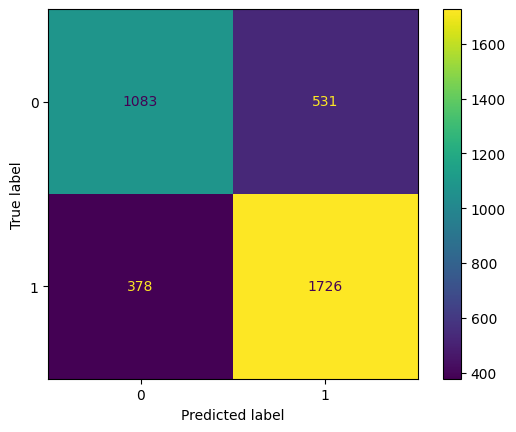

In [460]:
test_pool = Pool(data=x_test, label=y_test, cat_features=cat_features)
y_pred = final_model.predict(test_pool)

from sklearn.metrics import accuracy_score, classification_report
acc_catboost = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

4                   coupon
11              occupation
14             CoffeeHouse
7                      age
10               education
13                     Bar
5               expiration
0              destination
17        Restaurant20To50
8            maritalStatus
16    RestaurantLessThan20
15               CarryAway
1                passanger
12                  income
2                  weather
3              temperature
6                   gender
20          direction_same
18       toCoupon_GEQ15min
19       toCoupon_GEQ25min
21           direction_opp
9             has_children
Name: Feature, dtype: object


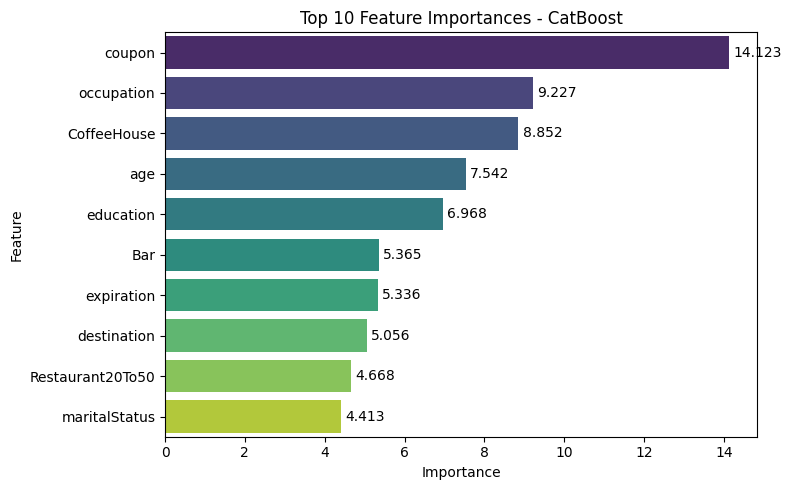

In [461]:
feature_importance = final_model.get_feature_importance(train_pool)
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
print(importance_df['Feature'])

# Plot Top 10 Features
plt.figure(figsize=(8, 5))
ax =sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette="viridis")
# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", padding=3)
plt.title("Top 10 Feature Importances - CatBoost")
plt.tight_layout()
plt.show()


In [462]:
# list of cat cols
cat_cols = [cols for cols in x_train.columns if x_train[cols].dtype == 'O']

# Label encoder
encoders = {}

# apply encoder for train data
for col in cat_cols:
    encoders[col] = LabelEncoder()
    x_train[col] = encoders[col].fit_transform(x_train[col])

# apply encoder for test data
for col in cat_cols:
    x_test[col] = encoders[col].transform(x_test[col])

In [463]:
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# Scale only for models that require it
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test_scaled[num_cols] = scaler.transform(x_test[num_cols])





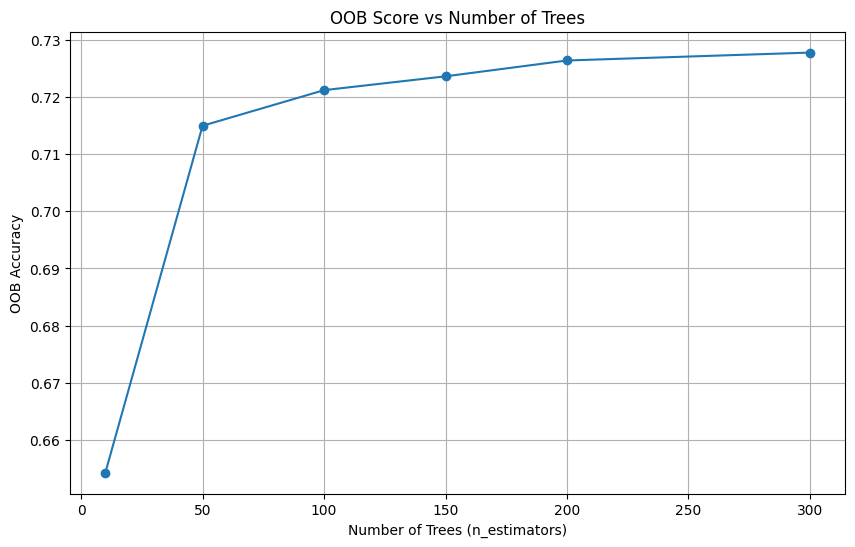

In [464]:
oob_scores = []
n_estimators_list = [10, 50, 100, 150, 200, 300]

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        oob_score=True,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf.fit(x_train, y_train)
    oob_scores.append(rf.oob_score_)     #rf.oob_score_ → shows the accuracy on the out-of-bag samples.

# Plot
plt.figure(figsize=(10,6))
plt.plot(n_estimators_list, oob_scores, marker='o')
plt.title("OOB Score vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("OOB Accuracy")
plt.grid(True)
plt.show()

Random Forest Results:
Accuracy: 0.7302313071543841

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66      1614
           1       0.73      0.82      0.77      2104

    accuracy                           0.73      3718
   macro avg       0.73      0.72      0.72      3718
weighted avg       0.73      0.73      0.73      3718



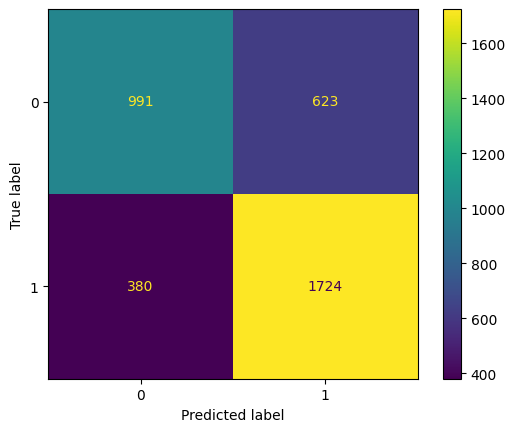

In [465]:

rf = RandomForestClassifier(n_estimators=200,class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

ROC AUC : 78.97 %


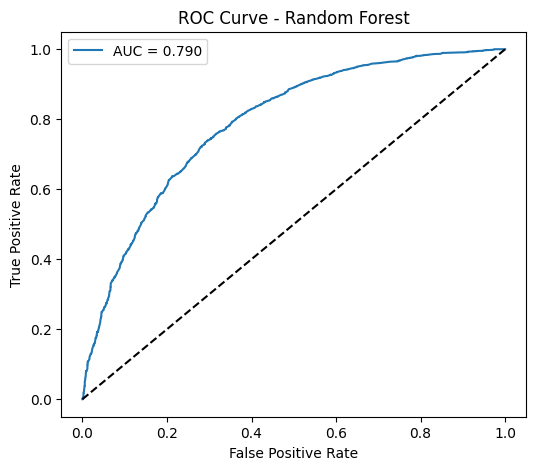

In [466]:
y_test_proba = rf.predict_proba(x_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_test_proba)*100,2) #roc_auc_score is used to measure the performance of a binary classifier at all classification thresholds.
print("ROC AUC :", roc_auc,'%')


fpr, tpr, thr= roc_curve(y_test, y_test_proba,pos_label=1) #It  measure the performance of a binary classifier at all classification thresholds

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_proba):.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [467]:
list_model = []
list_accuracy = []

# BaggingClassifier
bagging = BaggingClassifier(random_state=42,n_jobs=-1)     #It works by combining predictions from multiple models,Reduces variance and prevents overfitting.
bg = bagging.fit(x_train, y_train)
y_pred_bg = bagging.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# Logistic Regression            #A model that predicts the probability of a binary outcome by fitting data to a logistic (sigmoid) function.
logreg = LogisticRegression(max_iter=1000, random_state=42)
lr=logreg.fit(x_train_scaled, y_train)
y_pred_lr = logreg.predict(x_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


# RandomForestClassifier       #Many Decision Trees trained on random bootstrapped samples + random feature selection → aggregated via voting/averaging → robust, accurate, and reduces overfitting.
rforest = RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1)
rf = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=42)          #giving more weight to misclassified samples from previous models.
ada = adaboost.fit(x_train, y_train)
y_pred_ada = adaboost.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# GradientBoostingClassifier
gdboost = GradientBoostingClassifier(random_state=42)  #combining multiple weak learners (usually decision trees) sequentially, where each new model tries to correct the errors of the previous model.
gd = gdboost.fit(x_train, y_train)
y_pred_gd = gdboost.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# KNeighborsClassifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train_scaled, y_train)
y_pred_kn = knn.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_kn)


Checking  the accuracy score against model such as Bagging,LogReg,CatBoost,Random Forest,AdaBoost,GDBoost,KNN
  Model Name  Accuracy
0    Bagging  0.704680
1     LogReg  0.625605
2   CatBoost  0.755514
3         RF  0.735073
4   AdaBoost  0.674556
5    GDBoost  0.714363
6        KNN  0.635557


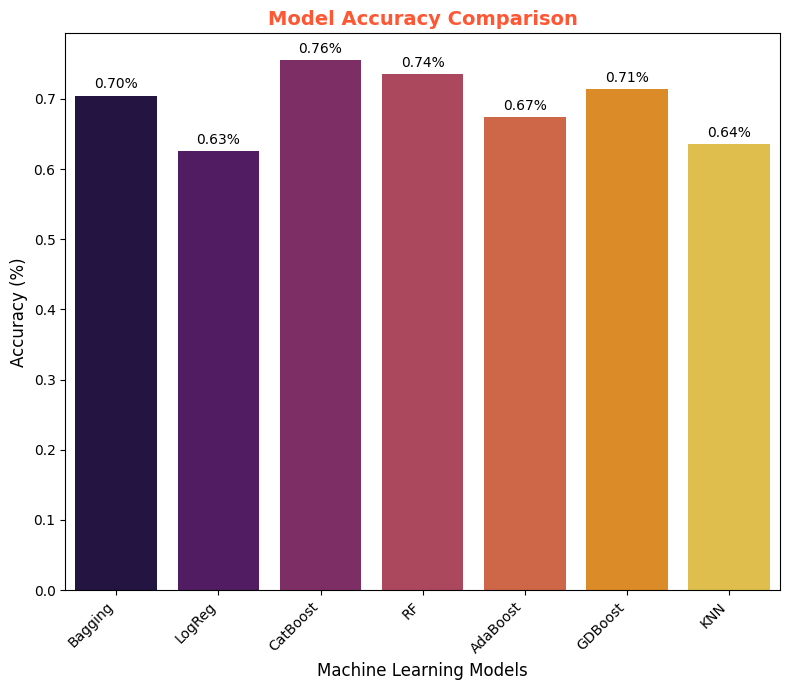

In [468]:
# Model names and their corresponding accuracy scores
list1 = ['Bagging', 'LogReg', 'CatBoost','RF', 'AdaBoost', 'GDBoost', 'KNN']
list2 = [accuracy_bg, accuracy_lr,acc_catboost, accuracy_rf, accuracy_ada, accuracy_gd, accuracy_knn]

print("Checking  the accuracy score against model such as Bagging,LogReg,CatBoost,Random Forest,AdaBoost,GDBoost,KNN")

# Create a DataFrame for better visualization
df_accuracy = pd.DataFrame({'Model Name': list1, 'Accuracy': list2})
print(df_accuracy)
# Create a barplot
plt.figure(figsize=(8,7 ))
ax = sns.barplot(x='Model Name', y='Accuracy', data=df_accuracy, palette="inferno")

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", label_type="edge", padding=3)

# Set plot title and labels
ax.set_title("Model Accuracy Comparison", fontsize=14, fontweight='bold', color='#FF5733')
ax.set_xlabel("Machine Learning Models", fontsize=12)
ax.set_ylabel("Accuracy (%)", fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

In [469]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Predictions for each model
y_pred_bg = bg.predict(x_test)
y_pred_lr = lr.predict(x_test_scaled)
y_pred_rf = rf.predict(x_test)
y_pred_ada = ada.predict(x_test)
y_pred_gd = gd.predict(x_test)
y_pred_knn = kn.predict(x_test_scaled)
y_pred_cat = final_model.predict(test_pool)

# Compute metrics
metrics = {
    'Model Name': ['Bagging', 'LogReg', 'CatBoost', 'RF', 'AdaBoost', 'GDBoost', 'KNN'],
    'Accuracy': [accuracy_bg, accuracy_lr, acc_catboost, accuracy_rf, accuracy_ada, accuracy_gd, accuracy_knn],
    'ROC_AUC': [roc_auc_score(y_test, bg.predict_proba(x_test)[:, 1]),
                roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:, 1]),
                roc_auc_score(y_test, final_model.predict_proba(test_pool)[:, 1]),
                roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]),
                roc_auc_score(y_test, ada.predict_proba(x_test)[:, 1]),
                roc_auc_score(y_test, gd.predict_proba(x_test)[:, 1]),
                roc_auc_score(y_test, kn.predict_proba(x_test_scaled)[:, 1])],
    'F1 Score': [f1_score(y_test, y_pred_bg),
                 f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_cat),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_ada),
                 f1_score(y_test, y_pred_gd),
                 f1_score(y_test, y_pred_knn)],
    'Precision': [precision_score(y_test, y_pred_bg),
                  precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_cat),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_ada),
                  precision_score(y_test, y_pred_gd),
                  precision_score(y_test, y_pred_knn)],
    'Recall': [recall_score(y_test, y_pred_bg),
               recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_cat),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_ada),
               recall_score(y_test, y_pred_gd),
               recall_score(y_test, y_pred_knn)]
}

# Create DataFrame
df_comparison = pd.DataFrame(metrics)
df_comparison = df_comparison.round(4)
print(df_comparison)



  Model Name  Accuracy  ROC_AUC  F1 Score  Precision  Recall
0    Bagging    0.7047   0.7650    0.7374     0.7421  0.7329
1     LogReg    0.6256   0.6586    0.6990     0.6413  0.7681
2   CatBoost    0.7555   0.8229    0.7916     0.7647  0.8203
3         RF    0.7351   0.7909    0.7786     0.7386  0.8232
4   AdaBoost    0.6746   0.7284    0.7288     0.6896  0.7728
5    GDBoost    0.7144   0.7730    0.7625     0.7200  0.8104
6        KNN    0.6356   0.6640    0.6943     0.6608  0.7315


## **OBSERVATIONS**


 Dataset Contains 12684 rows and 25 columns.

*  It has 8 numerical and 17 categorical features.
*   The data set contains 291 duplicate rows we deleted these duplicated rows.After which we have 12393 rows.


*  The target label Accept(Y/N?) propotion is
     **Y  --  1(coupon accepted)** --->56.58%,
     **N  --  0(coupon rejected)** ---> 43.42%

*   The target label Accept(Y/N?) Accepted contains 7012 dp's and Rejected contains 5381 dp's out of total 12393 dp's.


*   The following 6 feature has missing values

       1.   car                       12576
       2.   CoffeeHouse               217
       3.   Restaurant20To50          189
       4.   CarryAway                 151
       5.   RestaurantLessThan20      130
       6.   Bar                       107


*   There are missing values in Car,CoffeeHouse ,Restaurant20To50,CarryAway ,  RestaurantLessThan20 and Bar columns and out of these the 'car' variable has more 12287 null values, more than 99% of the values are NaN. We can just drop it off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

*   These  ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] features that has less than 30% missing values.

*   Mode and Median Imputation I have used to handle missing values of features that has that has less than 30% missing values


*  Insights of CATEGORICAL FEATURE -All the categorical feature has unique values greater than two.


*   Insights of **NUMERICAL FEATURE**
            
       1.  temperature has 3 unique value.
       2.  has_children has 2 unique value.
       3.  **toCoupon_GEQ5min has 1 unique value.**
       4.  toCoupon_GEQ15min has 2 unique value.
       5.  toCoupon_GEQ25min has 2 unique value.
       6.  direction_same has 2 unique value.
       7.  direction_opp has 2 unique value.
       8.  Accept(Y/N?) has 2 unique value.


*   After understanding the numerical feature We can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column.

*   The income column contains inconsistent formats like:

       **Ranges: "37500-49999"**

       **Phrases: "Lessthan12500", "100000 or More"**

      ** Symbols: "$", spaces, mixed casing **
      I have used clean_income function to convert messy income strings into clean numeric values for modeling.


*   Identifying the outlier using IQR methods only for numerical columns.there are no outliers for numerical feature.


*   These are the values which I have used for GridSearch param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500],
    'l2_leaf_reg': [1, 3, 5]
}



*   I have done hyper parameter tuning for my catboost model using grid search and identified the best paramter from the above param_grid as {'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500}


*   Then I have trained my model using these best params.

*   Then the model gives 76% accuracy.
*   Identified Top 10 features which give importance to train the model using feature_importance.
   
          1.   Coupon
          2.   Occupation
          3.   CoffeeHouse
          4.   age
          5.   education
          6.   Bar
          7.   expiration
          8.   destination
          9.   Restaurant20To50
          10.   maritalStatus


*   By using CatBoost     ROC AUC  : 82.2 %
*   By using Random Forest ROC AUC : 78.97 %


*  Checking  the accuracy score against model such as Bagging,LogReg,CatBoost,Random Forest,AdaBoost,GDBoost,KNN
      Model Name  Accuracy
0    Bagging      0.704680
1    LogReg       0.625605
2    CatBoost     0.755514
3    RF           0.735073
4    AdaBoost      0.674556
5    GDBoost       0.714363
6    KNN           0.635557


*   Out of all these models catboost gives 75% accuracy.



**PROJECT DONE BY**
   
    S.SUGUNA ME


